### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingreso total por cada tienda:

Suma Total de la Tienda 1: 1,150,880,400.00
Suma Total de la Tienda 2: 1,116,343,500.00
Suma Total de la Tienda 3: 1,098,019,600.00
Suma Total de la Tienda 4: 1,038,375,700.00


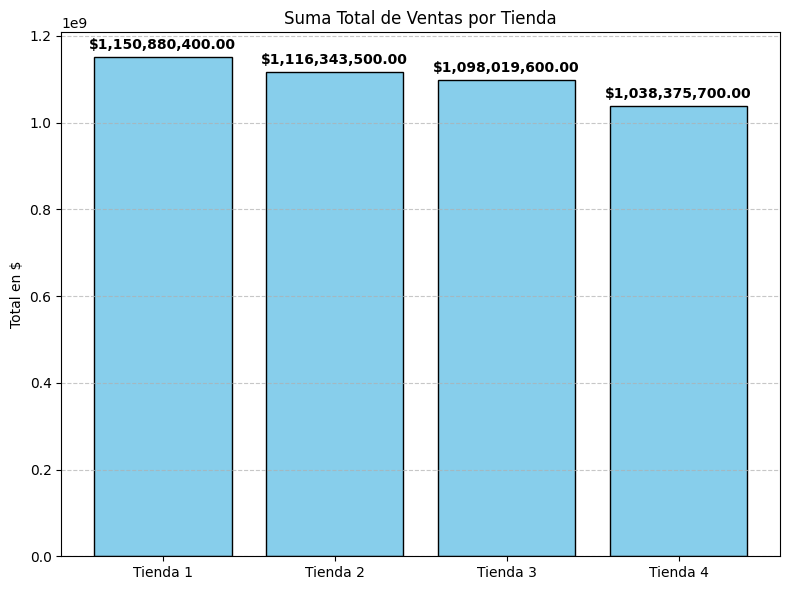

In [7]:
SumaT1 = tienda['Precio'].sum()
SumaT2 = tienda2['Precio'].sum()
SumaT3 = tienda3['Precio'].sum()
SumaT4 = tienda4['Precio'].sum()

print(f"Suma Total de la Tienda 1: {SumaT1:,.2f}")
print(f"Suma Total de la Tienda 2: {SumaT2:,.2f}")
print(f"Suma Total de la Tienda 3: {SumaT3:,.2f}")
print(f"Suma Total de la Tienda 4: {SumaT4:,.2f}")

nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
sumas = [SumaT1, SumaT2, SumaT3, SumaT4]
plt.figure(figsize=(8, 6))
bars = plt.bar(nombres_tiendas, sumas, color='skyblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(sumas)*0.01, f"${yval:,.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Suma Total de Ventas por Tienda")
plt.ylabel("Total en $")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

Cantidad de productos vendidos por categoría:

Tienda 1
Categoría más vendida: Muebles (1446 unidades)
Detalle por categoría:
Categoría del Producto
Muebles                    1446
Electrónicos               1341
Electrodomésticos           906
Juguetes                    872
Deportes y diversión        796
Instrumentos musicales      573
Libros                      520
Artículos para el hogar     489
Name: Cantidad de cuotas, dtype: int64

Tienda 2
Categoría más vendida: Electrónicos (1333 unidades)
Detalle por categoría:
Categoría del Producto
Electrónicos               1333
Muebles                    1265
Electrodomésticos           890
Juguetes                    876
Deportes y diversión        720
Instrumentos musicales      659
Libros                      611
Artículos para el hogar     493
Name: Cantidad de cuotas, dtype: int64

Tienda 3
Categoría más vendida: Muebles (1408 unidades)
Detalle por categoría:
Categoría del Producto
Muebles                    1408
Electrónicos      

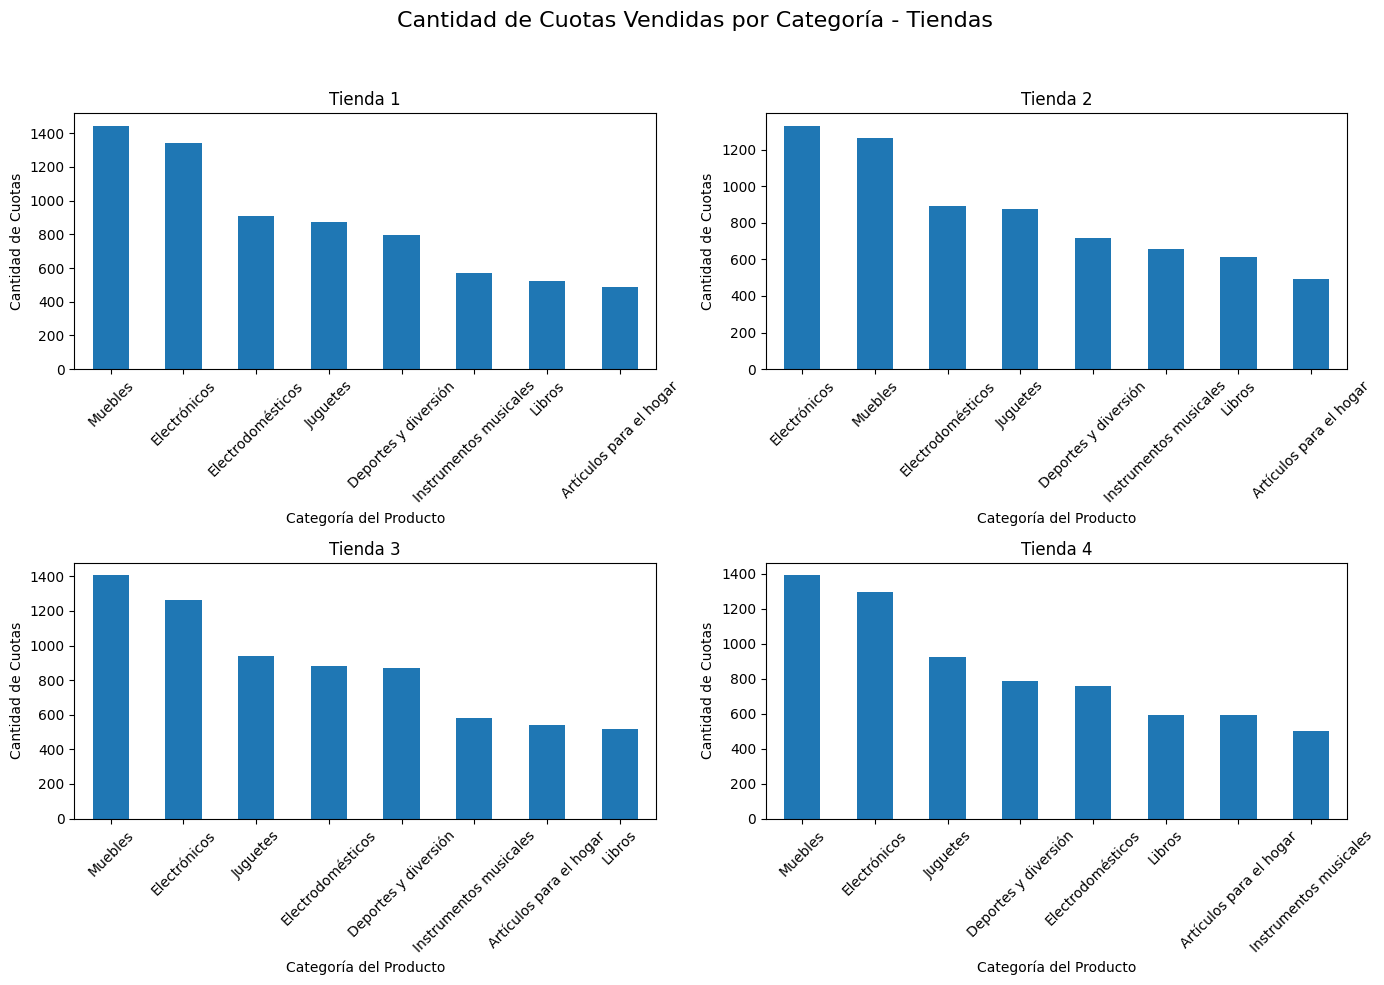

In [4]:
# Agrupar y Sumar Categorias
Cat1 = tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
Cat2 = tienda2.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
Cat3 = tienda3.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
Cat4 = tienda4.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()

# Función para resumen de una tienda
def Categorias(nombre_tienda, categorias):
    print(f"\n{nombre_tienda}")
    print(f"Categoría más vendida: {categorias.idxmax()} ({categorias.max()} unidades)")
    print("Detalle por categoría:")
    #Ordena las Cat de Mayor a Menor
    print(categorias.sort_values(ascending=False))

print("Cantidad de productos vendidos por categoría:")

Categorias("Tienda 1", Cat1)
Categorias("Tienda 2", Cat2)
Categorias("Tienda 3", Cat3)
Categorias("Tienda 4", Cat4)


#Aqui lo represento Visualmente con Matplot

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Cantidad de Cuotas Vendidas por Categoría - Tiendas", fontsize=16)

# Lista de categorías y nombres
categorias = [Cat1, Cat2, Cat3, Cat4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
axes = axes.flatten()

# Dibujar gráficos de barras para cada tienda
for i in range(4):
    categorias[i].sort_values(ascending=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(nombres_tiendas[i])
    axes[i].set_ylabel("Cantidad de Cuotas")
    axes[i].set_xlabel("Categoría del Producto")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
Cal1_T1 = round(tienda['Calificación'].mean(), 2)
Cal2_T2 = round(tienda2['Calificación'].mean(), 2)
Cal3_T3 = round(tienda3['Calificación'].mean(), 2)
Cal4_T4 = round(tienda4['Calificación'].mean(), 2)

print("La calificacion Promedio de la Tienda 1 es: ",Cal1_T1)
print("La calificacion Promedio de la Tienda 2 es: ",Cal2_T2)
print("La calificacion Promedio de la Tienda 3 es: ",Cal3_T3)
print("La calificacion Promedio de la Tienda 4 es: ",Cal4_T4)


La calificacion Promedio de la Tienda 1 es:  3.98
La calificacion Promedio de la Tienda 2 es:  4.04
La calificacion Promedio de la Tienda 3 es:  4.05
La calificacion Promedio de la Tienda 4 es:  4.0


# 4. Productos más y menos vendidos

Productos más y menos vendidos por tienda:

Tienda 1:
Más vendido:   Muebles (1446 unidades)
Menos vendido: Artículos para el hogar (489 unidades)

Tienda 2:
Más vendido:   Electrónicos (1333 unidades)
Menos vendido: Artículos para el hogar (493 unidades)

Tienda 3:
Más vendido:   Muebles (1408 unidades)
Menos vendido: Libros (517 unidades)

Tienda 4:
Más vendido:   Muebles (1392 unidades)
Menos vendido: Instrumentos musicales (500 unidades)



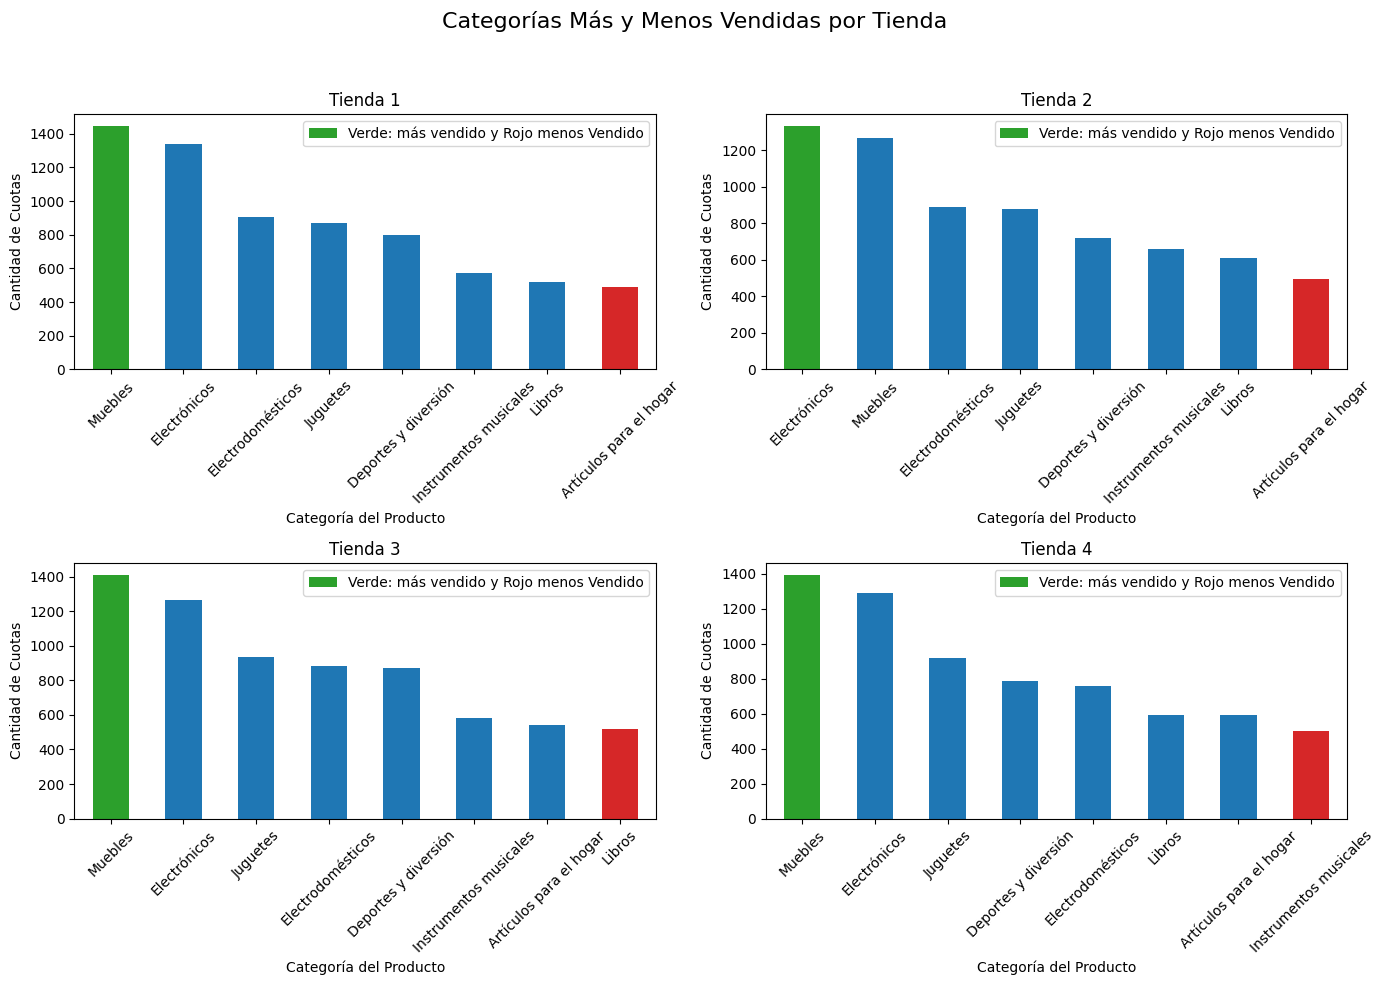

In [6]:
# Agrupamos las categorias
Productos_T1 = tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
Productos_T2 = tienda2.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
Productos_T3 = tienda3.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
Productos_T4 = tienda4.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()

# Función que define la categoría más y menos vendida
def Categorias(nombre_tienda, productos):
    mas_vendido = productos.idxmax()
    max_valor = productos.max()
    menos_vendido = productos.idxmin()
    min_valor = productos.min()
    print(f"{nombre_tienda}:")
    print(f"Más vendido:   {mas_vendido} ({max_valor} unidades)")
    print(f"Menos vendido: {menos_vendido} ({min_valor} unidades)\n")

print("Productos más y menos vendidos por tienda:\n")
Categorias("Tienda 1", Productos_T1)
Categorias("Tienda 2", Productos_T2)
Categorias("Tienda 3", Productos_T3)
Categorias("Tienda 4", Productos_T4)

productos = [Productos_T1, Productos_T2, Productos_T3, Productos_T4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Categorías Más y Menos Vendidas por Tienda", fontsize=16)

axes = axes.flatten()

for i in range(4):
    data = productos[i].sort_values(ascending=False)
    max_cat = data.idxmax()
    min_cat = data.idxmin()

    colors = ['tab:blue' if cat != max_cat and cat != min_cat else
              'tab:green' if cat == max_cat else 'tab:red' for cat in data.index]

    data.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(nombres_tiendas[i])
    axes[i].set_ylabel("Cantidad de Cuotas")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(['Verde: más vendido y Rojo menos Vendido'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 5. Envío promedio por tienda

In [ ]:
EnvP_T1 = round(tienda['Costo de envío'].mean(), 2)
EnvP_T2 = round(tienda2['Costo de envío'].mean(), 2)
EnvP_T3 = round(tienda3['Costo de envío'].mean(), 2)
EnvP_T4 = round(tienda4['Costo de envío'].mean(), 2)

print(f"El envío promedio de la Tienda 1 es: {EnvP_T1:,.2f}")
print(f"El envío promedio de la Tienda 2 es: {EnvP_T2:,.2f}")
print(f"El envío promedio de la Tienda 3 es: {EnvP_T3:,.2f}")
print(f"El envío promedio de la Tienda 4 es: {EnvP_T4:,.2f}")


El envío promedio de la Tienda 1 es: 26,018.61
El envío promedio de la Tienda 2 es: 25,216.24
El envío promedio de la Tienda 3 es: 24,805.68
El envío promedio de la Tienda 4 es: 23,459.46
